In [141]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import matplotlib.patheffects as PathEffects
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm
# tqdm.pandas(desc='Processing Dataframe', leave=False, position=1)
import ptitprince as pt

mpl.style.use('seaborn')

# Set the default text font size
plt.rc('font', size=16)# Set the axes title font size
plt.rc('axes', titlesize=16)# Set the axes labels font size
plt.rc('axes', labelsize=16)# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)# Set the legend font size
plt.rc('legend', fontsize=18)# Set the font size of the figure title
plt.rc('figure', titlesize=20)

In [5]:
dataset = pd.read_hdf('data.h5', key='dataset')
dataset

,Condition,CrashCount,StrafeCount,TimeTaken,TotalHeadMovement,TotalEyeMovement,Block,VisionAid,Hallway,ControllerFamiliarity,VRFamiliarity,Gender,Sex,Height,Age,Subject
0,GazeIgnored,9,3,123.166022,0.043065,0.0,00,None,2,2,0,Woman,Female,171.0,25,001
1,SimulationFixedToGaze,11,4,267.374972,0.039518,0.0,00,None,3,2,0,Woman,Female,171.0,25,001
2,GazeAssistedSampling,7,2,91.011563,0.034851,0.0,00,None,1,2,0,Woman,Female,171.0,25,001
3,GazeIgnored,4,4,104.942092,0.039674,0.0,01,None,3,2,0,Woman,Female,171.0,25,001
4,SimulationFixedToGaze,4,3,102.300905,0.039632,0.0,01,None,1,2,0,Woman,Female,171.0,25,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,GazeIgnored,5,0,62.029107,0.065739,0.0,01,None,1,5,2 - 10,Man,Male,188.0,23,023
203,GazeAssistedSampling,7,2,70.520212,0.060750,0.0,01,None,3,5,2 - 10,Man,Male,188.0,23,023
204,SimulationFixedToGaze,5,2,81.801864,0.082231,0.0,02,None,1,5,2 - 10,Man,Male,188.0,23,023
205,GazeIgnored,9,1,62.897180,0.066833,0.0,02,None,3,5,2 - 10,Man,Male,188.0,23,023


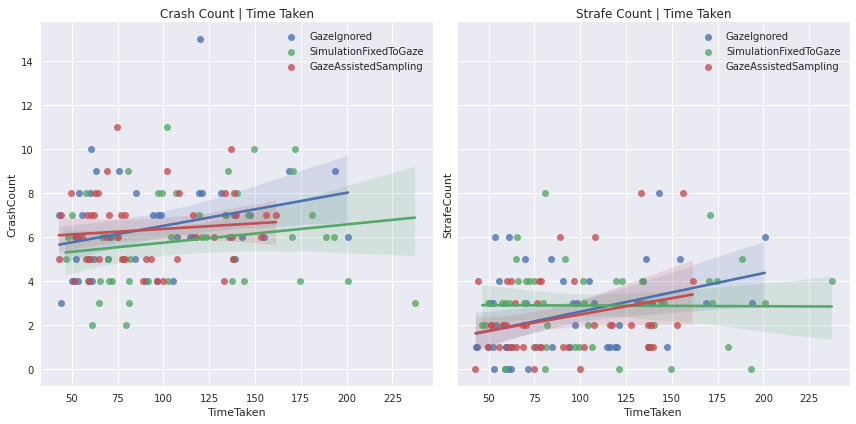

In [67]:
fig, axs = plt.subplots(1,2,figsize=(12,6), sharex=True, sharey=True)
data = dataset.loc[(dataset.Block == '01') | (dataset.Block == '02')]
kwargs = {
    'n_boot' : 1000,
    'robust' : False
}

axs[0].set_title('Crash Count | Time Taken')
axs[1].set_title('Strafe Count | Time Taken')
for cId, con in enumerate(data.Condition.unique()):
    dat = data.loc[data.Condition == con]
    sns.regplot(data=dat, x="TimeTaken", y="CrashCount", ax=axs[0], label=con, **kwargs)
    sns.regplot(data=dat, x="TimeTaken", y="StrafeCount", ax=axs[1], label=con, **kwargs)

axs[0].legend()
axs[1].legend()
        
plt.tight_layout()

In [138]:
dataset

,Condition,CrashCount,StrafeCount,TimeTaken,TotalHeadMovement,TotalEyeMovement,Block,VisionAid,Hallway,ControllerFamiliarity,VRFamiliarity,Gender,Sex,Height,Age,Subject
0,GazeIgnored,9,3,123.166022,0.043065,0.0,00,None,2,2,0,Woman,Female,171.0,25,001
1,SimulationFixedToGaze,11,4,267.374972,0.039518,0.0,00,None,3,2,0,Woman,Female,171.0,25,001
2,GazeAssistedSampling,7,2,91.011563,0.034851,0.0,00,None,1,2,0,Woman,Female,171.0,25,001
3,GazeIgnored,4,4,104.942092,0.039674,0.0,01,None,3,2,0,Woman,Female,171.0,25,001
4,SimulationFixedToGaze,4,3,102.300905,0.039632,0.0,01,None,1,2,0,Woman,Female,171.0,25,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,GazeIgnored,5,0,62.029107,0.065739,0.0,01,None,1,5,2 - 10,Man,Male,188.0,23,023
203,GazeAssistedSampling,7,2,70.520212,0.060750,0.0,01,None,3,5,2 - 10,Man,Male,188.0,23,023
204,SimulationFixedToGaze,5,2,81.801864,0.082231,0.0,02,None,1,5,2 - 10,Man,Male,188.0,23,023
205,GazeIgnored,9,1,62.897180,0.066833,0.0,02,None,3,5,2 - 10,Man,Male,188.0,23,023


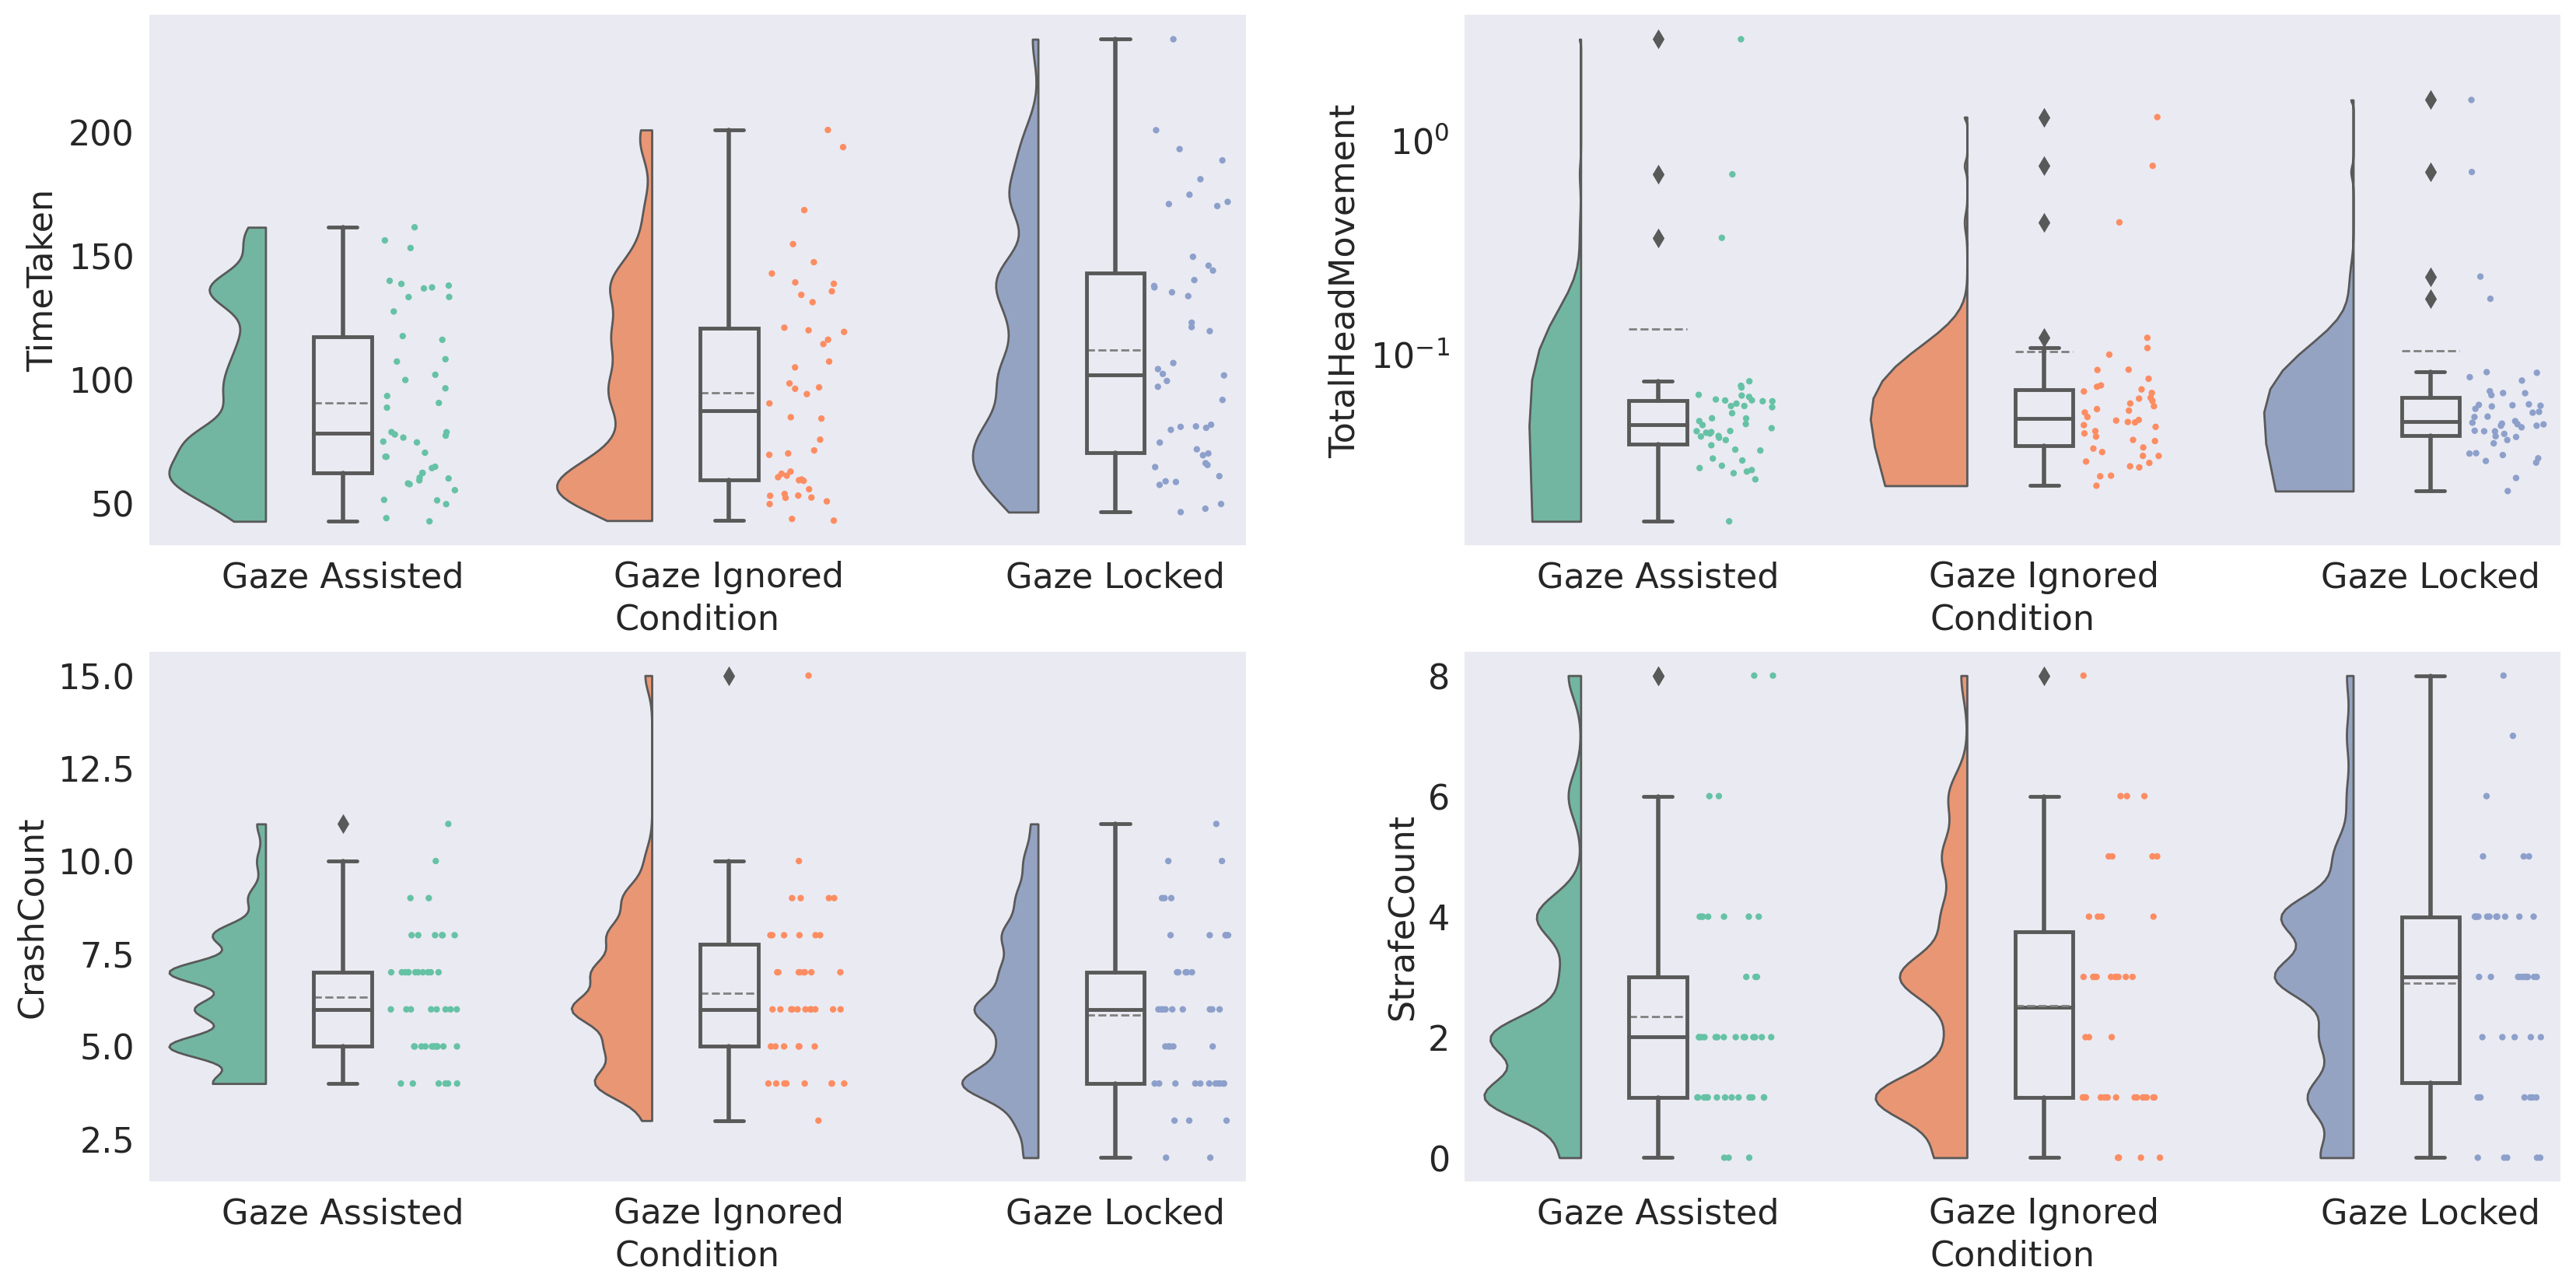

In [154]:
data = dataset.loc[(dataset.Block == '01') | (dataset.Block == '02')]
data = data.replace(to_replace={
    'GazeAssistedSampling' : 'Gaze Assisted',
    'GazeIgnored' : 'Gaze Ignored',
    'SimulationFixedToGaze' : 'Gaze Locked'
})

raincloudkwargs = {
    'move' : .2,
    'jitter' : .1,
    'box_showmeans' : True,
    'box_meanline' : True,
    'box_meanprops' : {'color':'grey'},
    'width_viol' : .5
}

with sns.axes_style('dark'):
    fig, axs = plt.subplots(2,2,figsize=(20,12), dpi=200)
    var = ['TimeTaken', 'TotalHeadMovement', 'CrashCount', 'StrafeCount']
    for idx, v in enumerate(var):
        ax = axs.flatten()[idx]
        pt.RainCloud(data=data, x='Condition', y=v, ax=ax, **raincloudkwargs)
        
    fig.subplots_adjust(top=0.75)
axs.flatten()[1].set_yscale('log')#lim((-.01,.25))
plt.show()

In [68]:
participant_survey_file = './participant_survey.csv'
column_mapping = {
    'Subject Information [Subject ID]' : "SubjectId",
    'Do you feel like you had enough training time with the simulated phosphene vision and the different conditions?  Use the comment box to add an explanation / details. ' : "EnoughTraining",
    'Do you feel like you had enough training time with the simulated phosphene vision and the different conditions?  Use the comment box to add an explanation / details.  [Comment]' : "EnoughTrainingComment",
    'Did you feel like you were still getting better throughout the trials in interpreting the simulated phosphene vision?  Use the comment box to add an explanation / details. ' : "ImprovedThroughoutBlocks",
    'Did you feel like you were still getting better throughout the trials in interpreting the simulated phosphene vision?  Use the comment box to add an explanation / details.  [Comment]' : "ImprovedThroughoutBlocksComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [relied on hands for specific parts (which?)]' : "StrategyHands",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [relied on hands for specific parts (which?)][Comment]' : "StrategyHandsComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [exaggerated or rhythmic head movements]' : "StrategyHeadMovement",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [exaggerated or rhythmic head movements][Comment]' : "StrategyHeadMovementComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating depth by moving sideways]' : "StrategySidewayMovement",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating depth by moving sideways][Comment]' : "StrategySidewayMovementComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating boundaries with the center most pixels/phosphenes]' : "StrategyCenterFocus",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating boundaries with the center most pixels/phosphenes][Comment]' : "StrategyCenterFocusComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating boundaries with the outer/peripheral pixels/phosphenes]' : "StrategyPeripheralFocus",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [estimating boundaries with the outer/peripheral pixels/phosphenes][Comment]' : "StrategyPeripheralFocusComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [ sticking to the walls]' : "StrategyWalls",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [ sticking to the walls][Comment]' : "StrategyWallsComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [ moving straight-forward with as little sideway movement as possible]' : "StrategyForwardFirst",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [ moving straight-forward with as little sideway movement as possible][Comment]' : "StrategyForwardFirstComment",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [Other]' : "StrategyOther",
    'Can you indicate whether you used any particular strategies to navigate? Use the comment box for any added information (e.g. only in specific conditions, specifications)  [Other comment]' : "StrategyOtherComment",
    'Did your strategies change throughout the experiment? If so, can you explain why? ' : "StrategyChange",
    'Did your strategies change throughout the experiment? If so, can you explain why?  [Comment]' : "StrategyChangeComment",
    'How used to / comfortable with using controllers are you? With a 1 being unfamiliar with controllers and 5 being controllers feeling natural to use to you.' : "ControllerFamiliarity",
    'How often have you used a virtual reality headset before? (e.g. HTC Vive, Oculus Quest, Google Cardboard, Oculus Rift, ...)' : "VRUsage",
    'Did you ever use the HTC Vive Wands (the controllers used in the experiment before)?' : "ViveWandExp",
    'Do you experience motion sickness regularly? (e.g. on the bus / train, while driving, in other VR environments, ...)' : "MotionSick",
    'Did you participate in any phosphene vision experiment or demo before?' : "PhospheneExp",
    'How old are you?' : "Age",
    'What sex were you assigned at birth / what is on your birth certificate?' : "Sex",
    'Pick the gender identity that best describes you currently' : "Gender",
    'How tall are you? (in cm)' : "Height"
}

surv_df = pd.read_csv(participant_survey_file, sep='\t')
surv_df = surv_df.rename(columns=column_mapping)
surv_df = surv_df.set_index("SubjectId")

block_eval_file = './block_eval_survey.csv'
column_mapping = {
    'Block Information [Block ID]' : "Block",
    'Block Information [Subject ID]' : 'SubjectId',
    'Order in which conditions occured [Rank 1]' : "1stCondition",
    'Order in which conditions occured [Rank 2]' : "2ndCondition",
    'Order in which conditions occured [Rank 3]' : "3rdCondition",
    'Rate the conditions in regard to how well you could navigate in each of them from 1 to 5. A lower number indicates you had a harder time navigating in it.  [1st trial / condition of this block]' : "1stNavRating",
    'Rate the conditions in regard to how well you could navigate in each of them from 1 to 5. A lower number indicates you had a harder time navigating in it.  [2nd trial / condition of this block]' : "2ndNavRating",
    'Rate the conditions in regard to how well you could navigate in each of them from 1 to 5. A lower number indicates you had a harder time navigating in it.  [3rd trial / condition of this block]' : "3rdNavRating",
    'Which condition do you think you performed best in?' : "BestCondition",
    'Select all conditions that you experienced nausea or motion sickness in. [1st trial / condition of this block]' : "1stNausea",
    'Select all conditions that you experienced nausea or motion sickness in. [2nd trial / condition of this block]' : "2ndNausea",
    'Select all conditions that you experienced nausea or motion sickness in. [3rd trial / condition of this block]' : "3rdNausea",
    'Rank the conditions in order of how tiring they were, with the least tiring at the top and most tiring at the bottom. [Rank 1]' : "1stTiring",
    'Rank the conditions in order of how tiring they were, with the least tiring at the top and most tiring at the bottom. [Rank 2]' : "2ndTiring",
    'Rank the conditions in order of how tiring they were, with the least tiring at the top and most tiring at the bottom. [Rank 3]' : "3rdTiring",
    'Rank the conditions in order of comfort, with the most comfortable at the top and least comfortable at the bottom. [Rank 1]' : "1stComfort",
    'Rank the conditions in order of comfort, with the most comfortable at the top and least comfortable at the bottom. [Rank 2]' : "2ndComfort",
    'Rank the conditions in order of comfort, with the most comfortable at the top and least comfortable at the bottom. [Rank 3]' : "3rdComfort",
    'Mark how much you feel the statement applies to you right now. [I feel tired / distracted]' : "Tired_Distracted",
    'Mark how much you feel the statement applies to you right now. [I can concentrate]' : "Concentration",
    'Order the conditions in the order they appeared in this block, with the first condition at the top and the last condition at the bottom: [Rank 1]' : "1stConditionSubj",
    'Order the conditions in the order they appeared in this block, with the first condition at the top and the last condition at the bottom: [Rank 2]' : "2ndConditionSubj",
    'Order the conditions in the order they appeared in this block, with the first condition at the top and the last condition at the bottom: [Rank 3]' : "3rdConditionSubj",
    'Anything else you would like to note about this block? (e.g. technical issues, notable pysical or emotional reactions, anything you would have liked to add to the previous questions, ...)' : "Comments"
}

eval_df = pd.read_csv(block_eval_file, sep='\t')
eval_df = eval_df.rename(columns=column_mapping)
eval_df.set_index(['SubjectId', 'Block'], inplace=True)
eval_df = eval_df.replace(to_replace = {"Condition A (eye movement ignored)" : "G.Ignored",
                    "Condition B (locked to your focus point)" : "G.Locked",
                    "Condition C (eye movement to scan the scene)" : "G.Asissted",
                    "Gaze Ignored" : "G.Ignored",
                    "Gaze Locked" : "G.Locked",
                    "Gaze Asissted" : "G.Asissted" })

In [118]:
dfBySubj = eval_df.drop(columns=['1stCondition', '2ndCondition', '3rdCondition'])\
                .rename(columns={'1stConditionSubj' : '1stCondition', '2ndConditionSubj' : '2ndCondition', '3rdConditionSubj':'3rdCondition'})\
                .reset_index()\
                .apply(lambda row: row.replace(to_replace={
                    "1st trial / condition of this block" : row['1stCondition'],
                    "2nd trial / condition of this block" : row['2ndCondition'],
                    "3rd trial / condition of this block" : row['3rdCondition']
                }), axis=1)\
                .set_index(['SubjectId', 'Block'])
dfByTrial = eval_df.reset_index()\
                .apply(lambda row: row.replace(to_replace={
                    "1st trial / condition of this block" : row['1stCondition'],
                    "2nd trial / condition of this block" : row['2ndCondition'],
                    "3rd trial / condition of this block" : row['3rdCondition']
                }), axis=1)\
                .set_index(['SubjectId', 'Block'])

dfNoWrong = eval_df[(eval_df[["1stCondition", "2ndCondition", "3rdCondition"]].values == eval_df[["1stConditionSubj", "2ndConditionSubj", "3rdConditionSubj"]].values).all(axis=1)]\
            .reset_index()\
            .apply(lambda row: row.replace(to_replace={
                "1st trial / condition of this block" : row['1stCondition'],
                "2nd trial / condition of this block" : row['2ndCondition'],
                "3rd trial / condition of this block" : row['3rdCondition']
            }), axis=1)\
            .set_index(['SubjectId', 'Block'])

In [119]:
def t_test(diff, n):
    """Dependent t-test for paired samples"""
    mean = diff.mean()
    std = diff.std()

    t = mean / (std / np.sqrt(n))
    p = stats.t.sf(np.abs(t), n-1) * 2
    print(f"t = {t:.4f} ; p = {p:.6f}")

def rating_by_condition(data):
    dfs = []
    for no in ['1st', '2nd', '3rd']:
        select = [f'{no}{part}' for part in ['Condition', 'NavRating', 'Nausea']]
        tmp = data[select].copy()
        tmp.columns = ['Condition', 'NavRating', 'Nausea']

        comf = data[[f'{no}Condition', '1stComfort', '2ndComfort', '3rdComfort']]
        comf = comf.set_index(f'{no}Condition').reset_index()
        comf = comf.T[comf.T.iloc[0] == comf.T.iloc[1:]].iloc[1:].bfill().isna().sum()
        comf.index = tmp.index

        tir = data[[f'{no}Condition', '1stTiring', '2ndTiring', '3rdTiring']]
        tir = tir.set_index(f'{no}Condition').reset_index()
        tir = tir.T[tir.T.iloc[0] == tir.T.iloc[1:]].iloc[1:].bfill().isna().sum()
        tir.index = tmp.index

        tmp['Comfort'] = comf
        tmp['Tiring'] = tir
        dfs.append(tmp)

    return pd.concat(dfs).sort_index(level=[0,1])

def significance_testing(byCond):
    var = ['NavRating', 'Comfort', 'Tiring']

    gign = byCond[byCond.Condition == 'G.Ignored']
    glck = byCond[byCond.Condition == 'G.Locked']
    gass = byCond[byCond.Condition == 'G.Asissted']

    agg = byCond.groupby('Condition')[var].agg(['mean', 'std'])
    n = byCond.groupby('Condition').count().iloc[0,0]
    gass = agg.loc['G.Asissted']
    gign = agg.loc['G.Ignored']
    glck = agg.loc['G.Locked']

    print(f'>> Running on {n} samples <<')

    for v in var:
        print('='*15, v, '='*15)
        print("Ign | Lck :", end=''); t_test((gign[v] - glck[v]), n)
        print("Ass | Lck :", end=''); t_test((gass[v] - glck[v]), n)
        print("Ign | Ass :", end=''); t_test((gign[v] - gass[v]), n)

In [128]:
data.reset_index().Block.value_counts()

2    16
3    13
1     9
Name: Block, dtype: int64

In [162]:
dfNoWrong.reset_index().groupby('SubjectId')['Block'].value_counts()

SubjectId  Block
1          1        1
           2        1
2          2        1
           3        1
3          1        1
           2        1
           3        1
4          1        1
5          1        1
           2        1
           3        1
6          2        1
           3        1
7          2        1
           3        1
9          1        1
           2        1
11         2        1
           3        1
12         1        1
           2        1
           3        1
13         1        1
           2        1
           3        1
14         2        1
           3        1
16         2        1
           3        1
18         2        1
           3        1
20         2        1
21         2        1
           3        1
22         1        1
23         1        1
           2        1
           3        1
Name: Block, dtype: int64

In [163]:
for data in [dfNoWrong, dfByTrial, dfBySubj]:
        byCond = rating_by_condition(data)
        significance_testing(byCond)

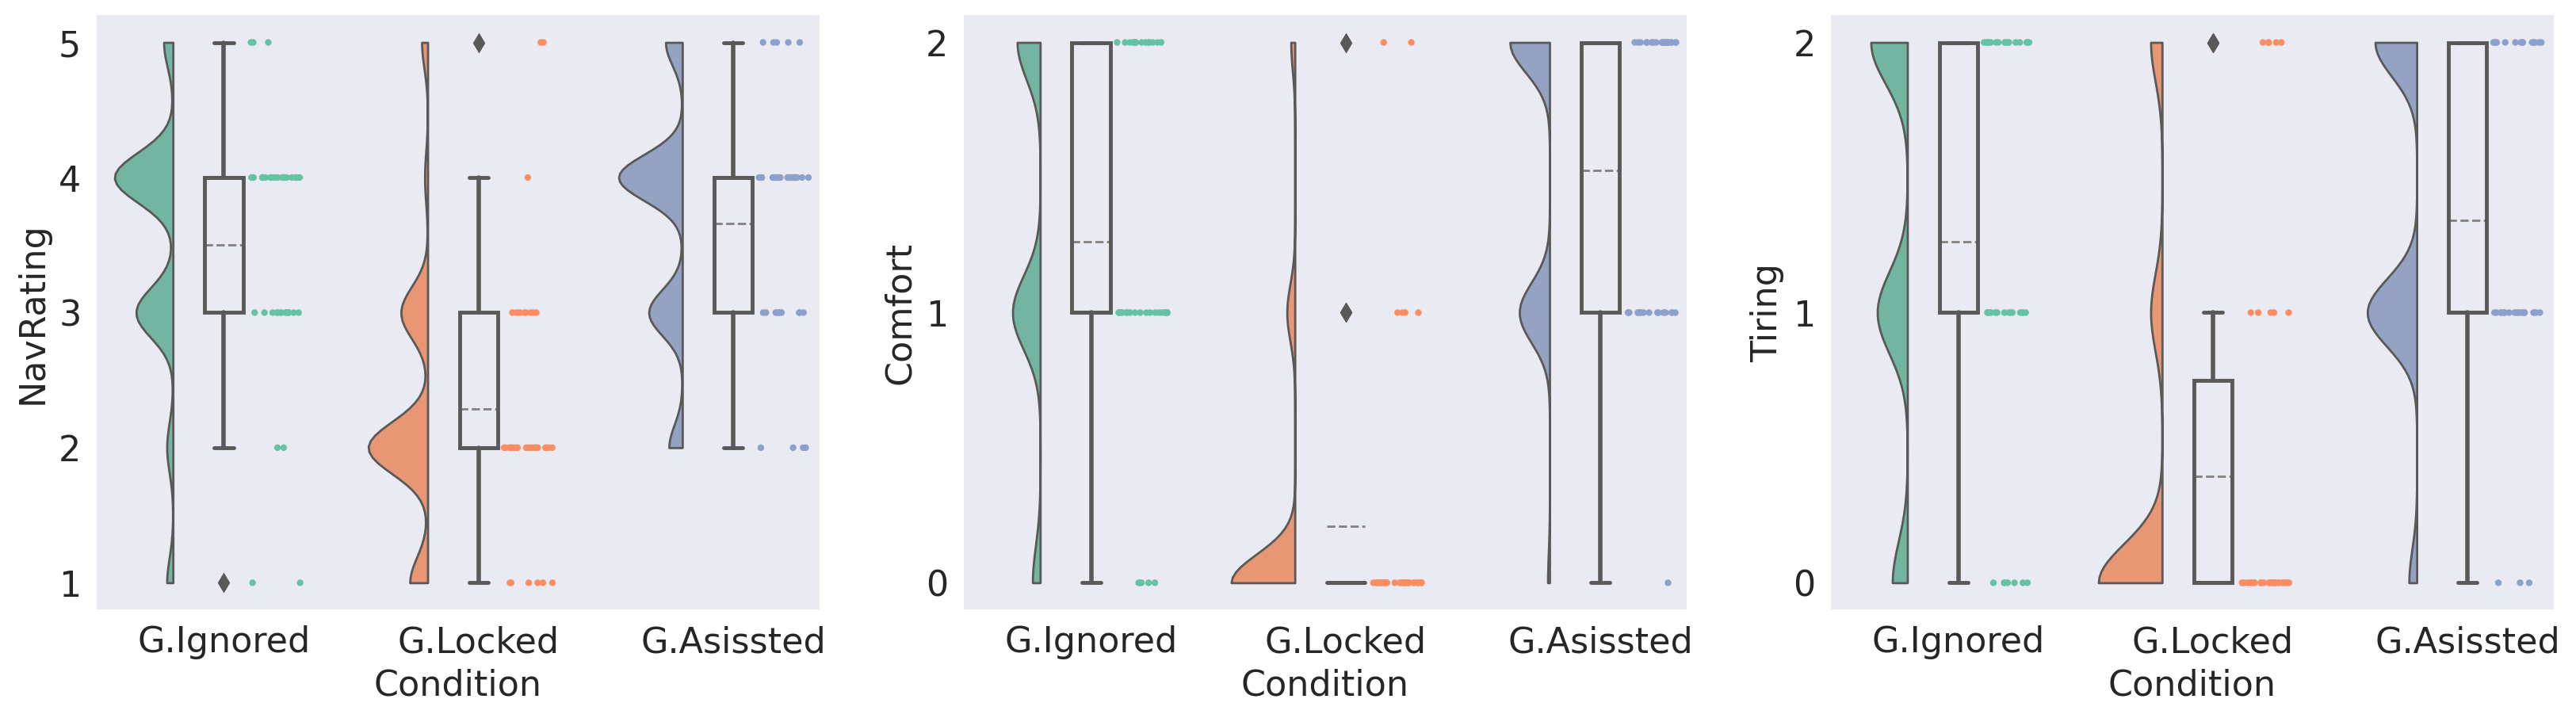

In [146]:
d = rating_by_condition(dfNoWrong).reset_index()

raincloudkwargs = {
    'move' : .2,
    'jitter' : .1,
    'box_showmeans' : True,
    'box_meanline' : True,
    'box_meanprops' : {'color':'grey'},
    'width_viol' : .5
}

with sns.axes_style('dark'):
    fig, axs = plt.subplots(1,3,figsize=(20,6), dpi=200)
    var = ['NavRating', 'Comfort', 'Tiring']
    for idx, v in enumerate(var):
        ax = axs[idx]
        pt.RainCloud(data=d, x='Condition', y=v, ax=ax, **raincloudkwargs)
        ticks = list(range(d[v].min(), d[v].max()+1))
        ax.set_yticks(ticks, ticks)
        # ax.grid(False)
        
    fig.subplots_adjust(top=0.75)
    plt.show()